Mounted at /content/drive


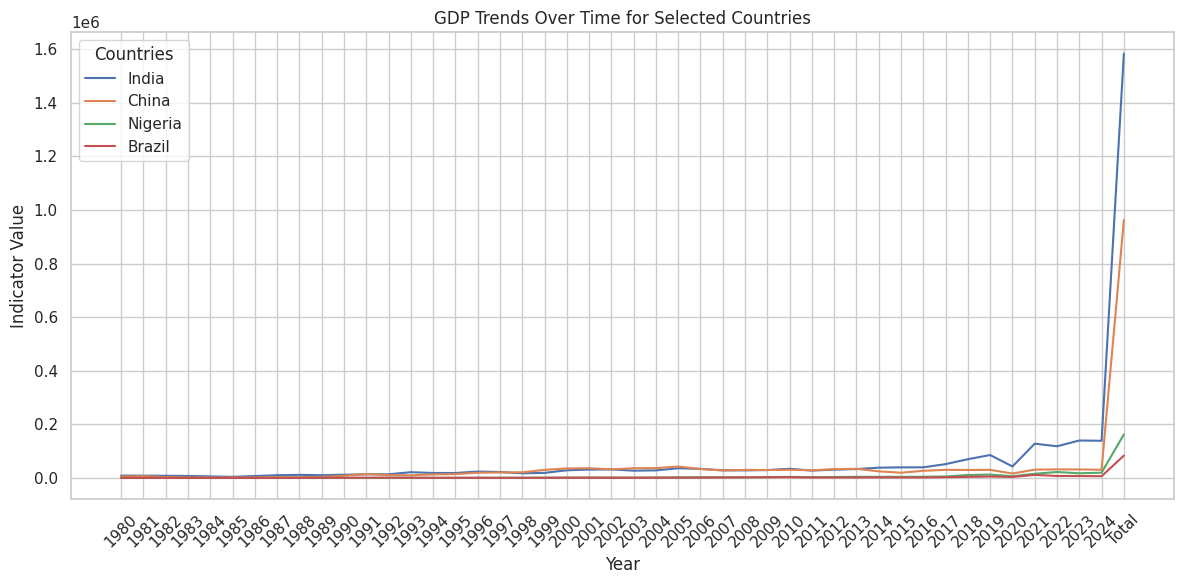

<ipython-input-4-481572301>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Continent', data=data_new, palette='Set2')


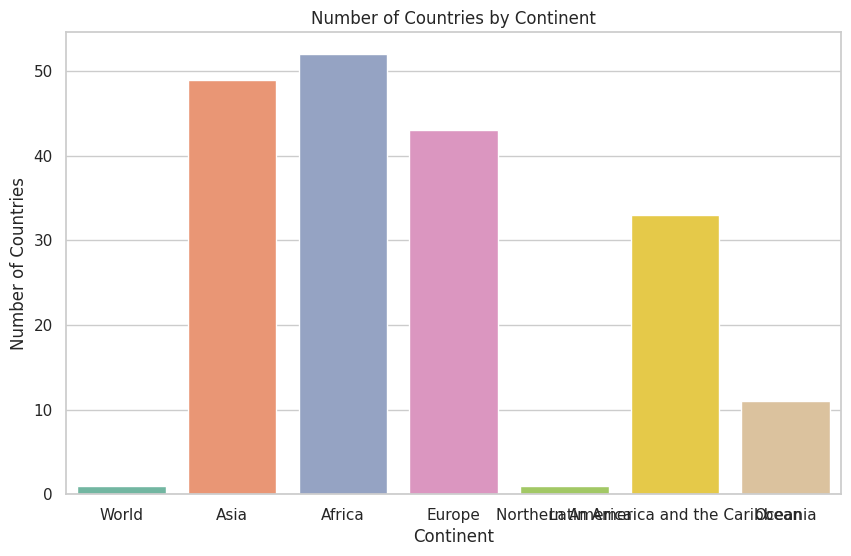

<ipython-input-4-481572301>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Country', data=top_countries, palette='Blues_d')


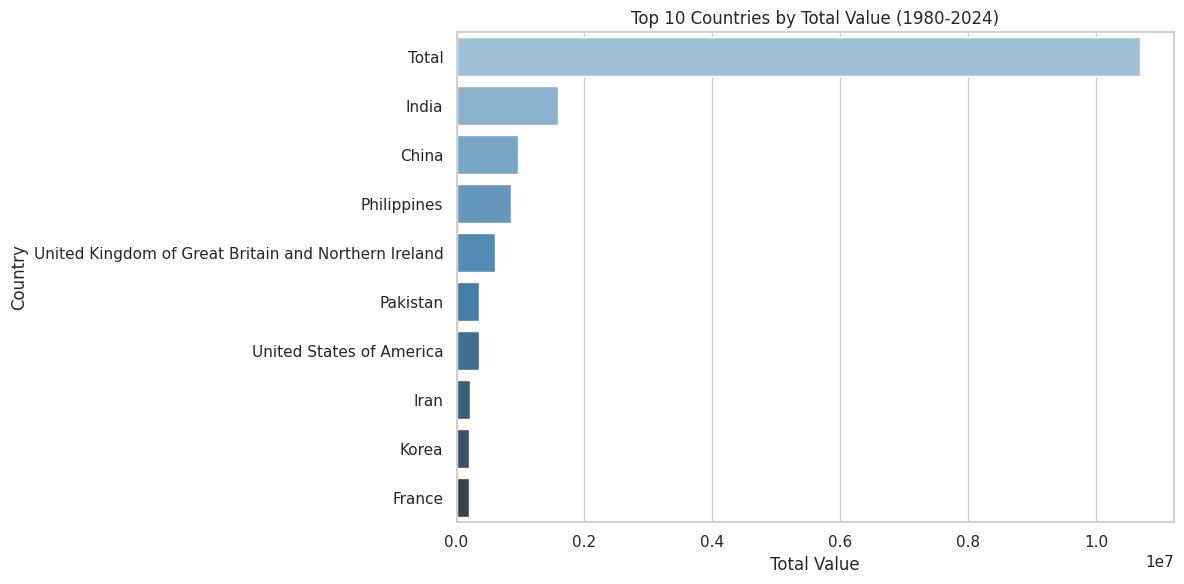

<ipython-input-4-481572301>:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


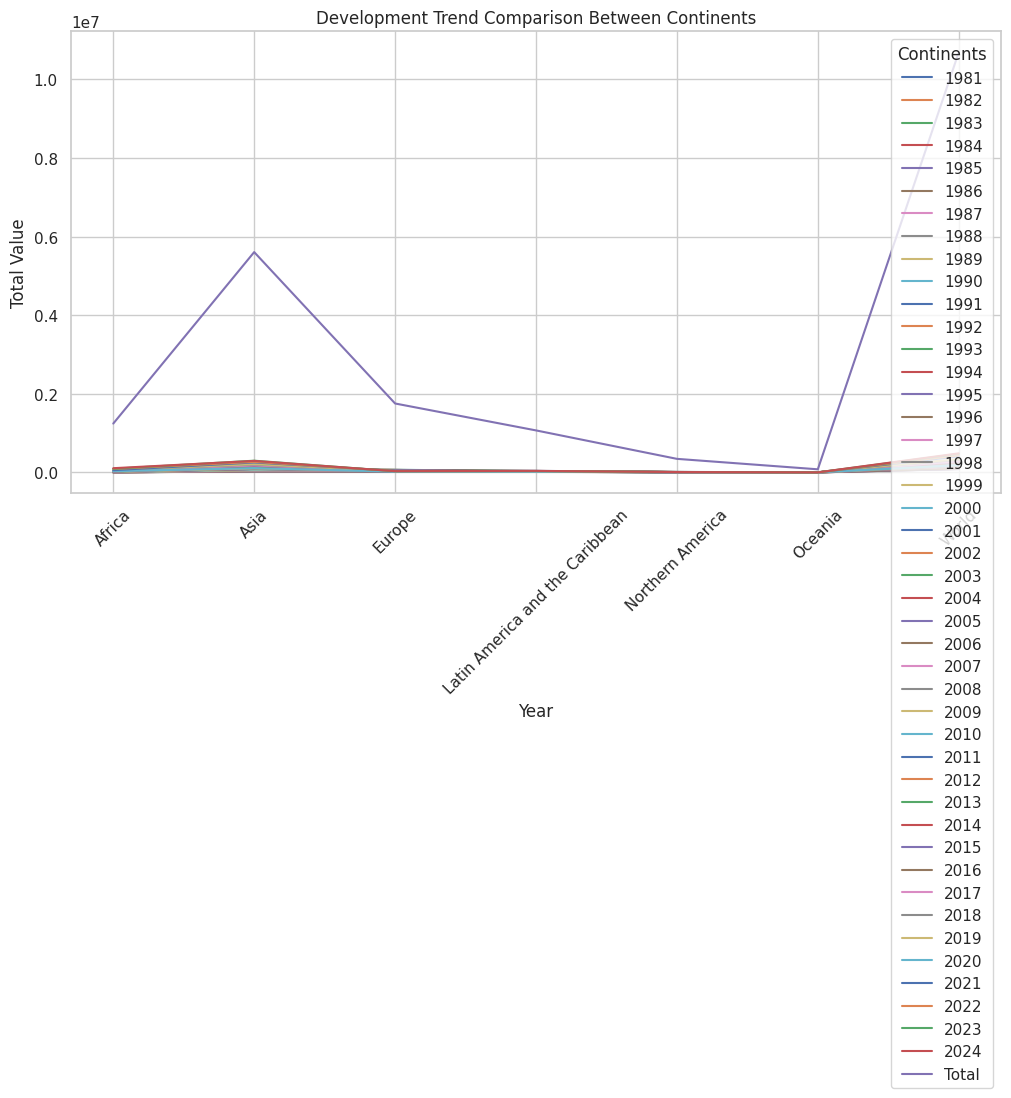

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/CS441_2025/CANADA/data/canadian_immigration_data1980-2024.csv'
data_new = pd.read_csv(file_path)

# Set the visual style
sns.set(style="whitegrid")

# 1. Visualize GDP (or another indicator) trends over time for a few selected countries
countries = ['India', 'China', 'United States', 'Nigeria', 'Brazil']
selected_data = data_new[data_new['Country'].isin(countries)]

# Plot the trend of these countries over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = selected_data[selected_data['Country'] == country].iloc[:, 5:-1].transpose()  # exclude first 5 columns and last column
    plt.plot(country_data, label=country)

plt.title('GDP Trends Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.legend(title='Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Country distribution by continent/region (Bar plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=data_new, palette='Set2')
plt.title('Number of Countries by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.show()

# 3. Top countries by total value (Bar plot)
top_countries = data_new[['Country', 'Total']].sort_values(by='Total', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Country', data=top_countries, palette='Blues_d')
plt.title('Top 10 Countries by Total Value (1980-2024)')
plt.xlabel('Total Value')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 4. Trend comparison between continents (Line plot)
continent_data = data_new.groupby('Continent').sum().iloc[:, 5:-1].transpose()  # Group by continent, exclude non-relevant columns
plt.figure(figsize=(12, 6))
for continent in continent_data.index:
    plt.plot(continent_data.columns, continent_data.loc[continent], label=continent)

plt.title('Development Trend Comparison Between Continents')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend(title='Continents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()